In [163]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [164]:
kindle_df = pd.read_csv('kindle.csv')
kindle_df['product_review'] = kindle_df['product_review'].str.replace('\n', '')
kindle_df

,review_title,product_review,product_rating,reviewer
0,"Works fine, replaces a Gen 3.",If you own an earlier Paperwhite and it's st...,3.0 out of 5 stars,E. Hinrichsen II
1,Pinhole Bright Spots and Other Issues,"Updated Review on Oct 6, 2019:",4.0 out of 5 stars,Sir Mike
2,Battery life is awful,"I love Kindle, have always had one since the...",3.0 out of 5 stars,Ship210
3,A Review From 2 Perspectives,I feel I need to approach this review from 2...,5.0 out of 5 stars,Rustic
4,It’s waterproof. Everything else is worse.,It’s infuriating that Amazon went to market ...,1.0 out of 5 stars,D. Bier
...,...,...,...,...
9996,My first Kindle - Love it!,"I've never used a Kindle, or any e-reader befo...",5.0 out of 5 stars,AngieF
9997,Amazon con job,"Can no longer ""Remove this title"" from my Kind...",3.0 out of 5 stars,thom flora
9998,A necessary evil...,I bought the Kindle Paperwhite so I could down...,4.0 out of 5 stars,Sylvia
9999,New and imporved,Smaller and lighter (green is the new one and ...,5.0 out of 5 stars,kattface6


In [165]:
kindle_df['product_rating'] = kindle_df.product_rating.apply(lambda r: str(r.split()[0]))
kindle_df

,review_title,product_review,product_rating,reviewer
0,"Works fine, replaces a Gen 3.",If you own an earlier Paperwhite and it's st...,3.0,E. Hinrichsen II
1,Pinhole Bright Spots and Other Issues,"Updated Review on Oct 6, 2019:",4.0,Sir Mike
2,Battery life is awful,"I love Kindle, have always had one since the...",3.0,Ship210
3,A Review From 2 Perspectives,I feel I need to approach this review from 2...,5.0,Rustic
4,It’s waterproof. Everything else is worse.,It’s infuriating that Amazon went to market ...,1.0,D. Bier
...,...,...,...,...
9996,My first Kindle - Love it!,"I've never used a Kindle, or any e-reader befo...",5.0,AngieF
9997,Amazon con job,"Can no longer ""Remove this title"" from my Kind...",3.0,thom flora
9998,A necessary evil...,I bought the Kindle Paperwhite so I could down...,4.0,Sylvia
9999,New and imporved,Smaller and lighter (green is the new one and ...,5.0,kattface6


# Filling NaN values

In [110]:
print("product_rating: ", kindle_df['product_rating'].isnull().values.any())
print("product_review: ",kindle_df['product_review'].isnull().values.any())

product_rating:  False
product_review:  True


In [111]:
nan_values = kindle_df[kindle_df['product_review'].isnull()]
nan_values

,review_title,product_review,product_rating,reviewer
6757,Disappointing,NaN,2.0,Steve A


In [112]:
# if rating is positive, fill with good
# if rating is negative, fill with bad
# if rating is neutral, fill with average

# kindle_df['product_review'].fillna('bad')
kindle_df['product_review'] = kindle_df.product_review.replace(np.nan, 'bad', regex=True)
print("product_review: ",kindle_df['product_review'].isnull().values.any())
kindle_df

product_review:  False


,review_title,product_review,product_rating,reviewer
0,"Works fine, replaces a Gen 3.",If you own an earlier Paperwhite and it's st...,3.0,E. Hinrichsen II
1,Pinhole Bright Spots and Other Issues,"Updated Review on Oct 6, 2019:",4.0,Sir Mike
2,Battery life is awful,"I love Kindle, have always had one since the...",3.0,Ship210
3,A Review From 2 Perspectives,I feel I need to approach this review from 2...,5.0,Rustic
4,It’s waterproof. Everything else is worse.,It’s infuriating that Amazon went to market ...,1.0,D. Bier
...,...,...,...,...
9996,My first Kindle - Love it!,"I've never used a Kindle, or any e-reader befo...",5.0,AngieF
9997,Amazon con job,"Can no longer ""Remove this title"" from my Kind...",3.0,thom flora
9998,A necessary evil...,I bought the Kindle Paperwhite so I could down...,4.0,Sylvia
9999,New and imporved,Smaller and lighter (green is the new one and ...,5.0,kattface6


# Typecasting

In [113]:
kindle_df['product_rating'] = kindle_df['product_rating'].astype(str)
kindle_df.product_rating

0        3.0
1        4.0
2        3.0
3        5.0
4        1.0
        ... 
9996     5.0
9997     3.0
9998     4.0
9999     5.0
10000    3.0
Name: product_rating, Length: 10001, dtype: object

In [114]:
copy_df=kindle_df.copy()

# Categorizing the ratings

In [115]:
def RatingCat(row):
    if row['product_rating']>='3.5':     # if the rating is less than 2 then it is negative
        return "positive"
    #elif row['product_rating']>='4.0':   #if the rating is higher than 2 then it is positive
      #  return "positive"
    else:
        return "negative"

# Plotting the ratings

,review_title,product_review,product_rating,reviewer,category
0,"Works fine, replaces a Gen 3.",If you own an earlier Paperwhite and it's st...,3.0,E. Hinrichsen II,negative
1,Pinhole Bright Spots and Other Issues,"Updated Review on Oct 6, 2019:",4.0,Sir Mike,positive
2,Battery life is awful,"I love Kindle, have always had one since the...",3.0,Ship210,negative
3,A Review From 2 Perspectives,I feel I need to approach this review from 2...,5.0,Rustic,positive
4,It’s waterproof. Everything else is worse.,It’s infuriating that Amazon went to market ...,1.0,D. Bier,negative
...,...,...,...,...,...
9996,My first Kindle - Love it!,"I've never used a Kindle, or any e-reader befo...",5.0,AngieF,positive
9997,Amazon con job,"Can no longer ""Remove this title"" from my Kind...",3.0,thom flora,negative
9998,A necessary evil...,I bought the Kindle Paperwhite so I could down...,4.0,Sylvia,positive
9999,New and imporved,Smaller and lighter (green is the new one and ...,5.0,kattface6,positive


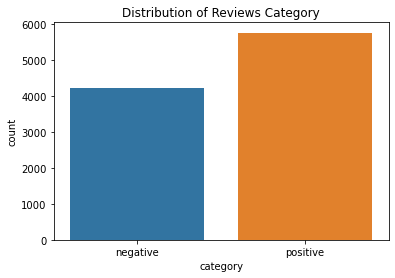

In [116]:
kindle_df['category']=kindle_df.apply(lambda row:RatingCat(row),axis=1)
sns.countplot(kindle_df['category']).set_title("Distribution of Reviews Category")   #distribution of the reviews
kindle_df

# Train Test Split

In [117]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/indupriyakompi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [118]:
from nltk.corpus import stopwords
from nltk import PorterStemmer as stemmer
from bs4 import BeautifulSoup 

import string
import re

In [85]:
STOPWORDS=stopwords.words("english") #stopwords are the most common unnecessary words. eg is, he, that, etc.

def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [86]:
def clean_text(text):
    ps=stemmer()
    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]) # remove punctuation
    
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces
    text_cleaned=text_cleaned.lower() # converting to lowercase
    tokens=text_cleaned.split(" ")
    tokens=[token for token in tokens if token not in STOPWORDS] # Taking only those words which are not stopwords
    text_cleaned=" ".join([ps.stem(token) for token in tokens])
    
    return text_cleaned
kindle_df['cleaned_product_review']=kindle_df['product_review'].apply(lambda x:clean_text(x))
kindle_df

,review_title,product_review,product_rating,reviewer,category,cleaned_product_review
0,"Works fine, replaces a Gen 3.",If you own an earlier Paperwhite and it's st...,3.0,E. Hinrichsen II,negative,earlier paperwhit still function compel reaso...
1,Pinhole Bright Spots and Other Issues,"Updated Review on Oct 6, 2019:",4.0,Sir Mike,positive,updat review oct 6 2019
2,Battery life is awful,"I love Kindle, have always had one since the...",3.0,Ship210,negative,love kindl alway one sinc first edit third pa...
3,A Review From 2 Perspectives,I feel I need to approach this review from 2...,5.0,Rustic,positive,feel need approach review 2 perspect
4,It’s waterproof. Everything else is worse.,It’s infuriating that Amazon went to market ...,1.0,D. Bier,negative,infuri amazon went market machin upgrad prior...
...,...,...,...,...,...,...
9996,My first Kindle - Love it!,"I've never used a Kindle, or any e-reader befo...",5.0,AngieF,positive,ive never use kindl eread wasnt sure much woul...
9997,Amazon con job,"Can no longer ""Remove this title"" from my Kind...",3.0,thom flora,negative,longer remov titl kindl content devic bought v...
9998,A necessary evil...,I bought the Kindle Paperwhite so I could down...,4.0,Sylvia,positive,bought kindl paperwhit could download book lib...
9999,New and imporved,Smaller and lighter (green is the new one and ...,5.0,kattface6,positive,smaller lighter green new one white old size s...


In [18]:
# Split data into training set and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(kindle_df['cleaned_product_review'], kindle_df['category'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train


Load 9000 training examples and 1001 validation examples. 

Show a review in the training set : 
  love read kindl hard go back paper book second paperwhit one end bottom lake wait week recov bought new one cant without


(2087     wait long time buy kindl paperwhit read book ...
 8653    big fan kindl long time final decid upgrad new...
 2363     receiv kindl gift gener good perform well how...
 3925     like reada lot 4th kindl tri fire batteri lif...
 3471     love kindl paperwhit distract finish novel bo...
                               ...                        
 9225    use read ipad use kindl app fine develop carpa...
 4859     research eread lot id never own one decid tak...
 3264     ive own kindl time far worst upgrad thing pap...
 9845    sensit screen need return home screen format l...
 2732     receiv gift husband devic fine littl clunki u...
 Name: cleaned_product_review, Length: 9000, dtype: object,
 2087    positive
 8653    negative
 2363    negative
 3925    positive
 3471    positive
           ...   
 9225    positive
 4859    positive
 3264    negative
 9845    positive
 2732    negative
 Name: category, Length: 9000, dtype: object)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
countVect = CountVectorizer() 

In [20]:
X_train_countVect = countVect.fit_transform(X_train)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])

Number of features : 8014 

Show some feature names : 
 ['000', 'battl', 'decid', 'fuch', 'kummaran', 'outi', 'riceinaziplock', 'temperatur', 'yup']


In [21]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on training set: {:.4f}".format(mnb.score(X_train_countVect, y_train)))
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    print ("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print ("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [22]:
# Train MultinomialNB classifier
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

MultinomialNB()

In [23]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
predictions = mnb.predict(countVect.transform(X_test))
modelEvaluation(predictions)


Accuracy on training set: 0.8543

Accuracy on validation set: 0.8142

Classification report : 
               precision    recall  f1-score   support

    negative       0.82      0.74      0.78       439
    positive       0.81      0.87      0.84       562

    accuracy                           0.81      1001
   macro avg       0.81      0.81      0.81      1001
weighted avg       0.81      0.81      0.81      1001


Confusion Matrix : 
 [[325 114]
 [ 72 490]]


In [24]:
from sklearn.svm import SVC, LinearSVC, NuSVC

In [25]:
from sklearn import svm
svc = svm.SVC()

In [26]:
svc.fit(X_train_countVect, y_train)

SVC()

In [27]:
predictions = svc.predict(countVect.transform(X_test))
modelEvaluation(predictions)


Accuracy on training set: 0.8543

Accuracy on validation set: 0.8981

Classification report : 
               precision    recall  f1-score   support

    negative       0.93      0.83      0.88       439
    positive       0.88      0.95      0.91       562

    accuracy                           0.90      1001
   macro avg       0.90      0.89      0.90      1001
weighted avg       0.90      0.90      0.90      1001


Confusion Matrix : 
 [[365  74]
 [ 28 534]]


In [28]:
test = "i like kindle"
print(mnb.predict(countVect.transform([test]))[0])

print(svc.predict(countVect.transform([test]))[0])


positive
positive


In [29]:
test = "this sucks"
print(mnb.predict(countVect.transform([test]))[0])

print(svc.predict(countVect.transform([test]))[0])


positive
negative


In [30]:
test = "battery is awful"
print(mnb.predict(countVect.transform([test]))[0])

print(svc.predict(countVect.transform([test]))[0])


positive
negative


In [31]:
test = "worst ever"
print(mnb.predict(countVect.transform([test]))[0])

print(svc.predict(countVect.transform([test]))[0])


negative
negative


# Some prep

In [86]:
print(kindle_df.shape[0],1)

10001 1


In [59]:
#df = pd.read_csv('C:/Dataset.csv')
kindle_df['split'] = np.random.randn(kindle_df.shape[0], 1)

msk = np.random.rand(len(kindle_df)) <= 0.7

train = kindle_df[msk]
test = kindle_df[~msk]

# Sentiment Classification Using BERT


Like keras, ktrain is a ML library that wraps the tf.keras APIs to simpler forms


In [54]:
import ktrain
from ktrain import text

In [61]:
# prepoc contains the preprocess mode and other information
# it takes cleaned_product_reviews in text col and category in target col
# there is wrapping of 500 words for each reviews- if reviews are < 500, padding is done
# id reviews > 500, truncation is done
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=train,
                                                                   text_column = 'cleaned_product_review',
                                                                   label_columns = 'category',
                                                                   val_df = test,
                                                                   maxlen = 500,
                                                                   preprocess_mode = 'bert')

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


We can see that it automatically detects the language and the type of classification. Cool!!

In [77]:
X_train[0].shape

(6998, 500)

In [62]:
# name = "bert" means, here we are using BERT model.

model = text.text_classifier(name = 'bert',
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 500
done.


In [63]:
#here we have taken batch size as 6 as from the documentation it is recommend to use this with maxlen as 500

learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

In [80]:
# find out best learning rate?
# learner.lr_find()
# learner.lr_plot()

# it may take days or many days to find out.

In [64]:
# Essentially fit is a very basic training loop, whereas fit one cycle uses the one cycle policy callback
# fit_onecycle is one of the fitting algo for ktrain

learner.fit_onecycle(lr = 2e-5, epochs = 1)

predictor = ktrain.get_predictor(learner.model, preproc)
#predictor.save('/bert')



begin training using onecycle policy with max lr of 2e-05...
1167/1167 [==============================] - 19243s 16s/step - loss: 0.6031 - accuracy: 0.6608 - val_loss: 0.4205 - val_accuracy: 0.8132


OSError: [Errno 30] Read-only file system: '/bert'

In [79]:
learner

In [67]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [74]:
data = ['kindle is horrible',
        'waste of money', 
        'beautiful as a gift',
        'I use it all day, everyday']

In [75]:
predictor.predict(data)

['negative', 'negative', 'positive', 'positive']

In [98]:
data = 'I use it all day, everyday'

In [99]:
print(mnb.predict(countVect.transform([data]))[0])

print(svc.predict(countVect.transform([data]))[0])

negative
positive


In [93]:
data='waste of money'

# RNN
# GRU
# LSTM
Read up

In [166]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku

import tensorflow as tf
from numpy.random import seed
seed(1)

In [167]:
kindle_df.head()

,review_title,product_review,product_rating,reviewer
0,"Works fine, replaces a Gen 3.",If you own an earlier Paperwhite and it's st...,3.0,E. Hinrichsen II
1,Pinhole Bright Spots and Other Issues,"Updated Review on Oct 6, 2019:",4.0,Sir Mike
2,Battery life is awful,"I love Kindle, have always had one since the...",3.0,Ship210
3,A Review From 2 Perspectives,I feel I need to approach this review from 2...,5.0,Rustic
4,It’s waterproof. Everything else is worse.,It’s infuriating that Amazon went to market ...,1.0,D. Bier


In [168]:
data = kindle_df['product_review'][:500]

In [169]:
data.head()

0      If you own an earlier Paperwhite and it's st...
1                       Updated Review on Oct 6, 2019:
2      I love Kindle, have always had one since the...
3      I feel I need to approach this review from 2...
4      It’s infuriating that Amazon went to market ...
Name: product_review, dtype: object

In [170]:
data.shape, data.isna().sum()

((500,), 0)

In [171]:
all_headlines = [h for h in data ]
len(all_headlines)

500

In [179]:
all_headlines[0]

'  If you own an earlier Paperwhite and it\'s still functional there is no compelling reason to buy the Gen 4 "All-New" Paperwhite ( Amazon misleadingly refers to this as "10th Generation". It\'s a 10th generation Kindle e-reader but only the 4th generation Paperwhite ) unless a limited degree of water resistance (not waterproof as they claim) is important to you or you want Bluetooth capability for Audiobooks. Neither of these are remotely important nor needed by me in an e-reader and Audiobooks are handled better by smaller, lighter and less power hungry devices. The additional storage is coals to Newcastle as Amazon\'s cloud can hold any overstorage needs an owner has. Personally, I don\'t know anyone who has ever run out of onboard storage on any Kindle, including the very first keyboard models, despite loading them with hundreds of books. The much touted, by Amazon, thinness and lightness of this edition is, in my opinion, overblown. Yes it is slightly thinner and slightly lighter

In [176]:
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii') # A function to remove emojis from the reviews

In [180]:
def cleanText(text):    
    text=deEmojify(text) # remove emojis
    text_cleaned="".join([x for x in text if x not in string.punctuation]).lower() # remove punctuation
    text_cleaned=re.sub(' +', ' ', text_cleaned) # remove extra white spaces    
    return text_cleaned

In [181]:
corpus = [cleanText(x) for x in all_headlines]
corpus

[' if you own an earlier paperwhite and its still functional there is no compelling reason to buy the gen 4 allnew paperwhite amazon misleadingly refers to this as 10th generation its a 10th generation kindle ereader but only the 4th generation paperwhite unless a limited degree of water resistance not waterproof as they claim is important to you or you want bluetooth capability for audiobooks neither of these are remotely important nor needed by me in an ereader and audiobooks are handled better by smaller lighter and less power hungry devices the additional storage is coals to newcastle as amazons cloud can hold any overstorage needs an owner has personally i dont know anyone who has ever run out of onboard storage on any kindle including the very first keyboard models despite loading them with hundreds of books the much touted by amazon thinness and lightness of this edition is in my opinion overblown yes it is slightly thinner and slightly lighter but not paradigm changing also bew

In [182]:
# Tokenization is a process of extracting tokens (terms / words) from a corpus
# Python’s library Keras has inbuilt model for tokenization which can be used 
# to obtain the tokens and their index in the corpus
# After this step, every text document in the dataset is converted into 
# sequence of tokens
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

In [183]:
inp_sequences, total_words = get_sequence_of_tokens(corpus)
inp_sequences[0:10]

[[41, 24],
 [41, 24, 297],
 [41, 24, 297, 38],
 [41, 24, 297, 38, 554],
 [41, 24, 297, 38, 554, 22],
 [41, 24, 297, 38, 554, 22, 5],
 [41, 24, 297, 38, 554, 22, 5, 28],
 [41, 24, 297, 38, 554, 22, 5, 28, 83],
 [41, 24, 297, 38, 554, 22, 5, 28, 83, 1016],
 [41, 24, 297, 38, 554, 22, 5, 28, 83, 1016, 87]]

|Ngram seq|Token of seq|
|---|---|
|[if you]|[41, 24]|
|[if you own]|[41, 24, 297]|
|[if you own an ]|[41, 24, 297, 38]|
|[if you own an earlier]|[41, 24, 297, 38, 554]|
|[if you own an earlier paperwhite]|[41, 24, 297, 38, 554, 22]|

In [184]:
# it is possible that different sequences have different lengths
# pad the sequences and make their lengths equal
def generate_padded_sequences(input_sequences):
    max_sequence_len = max([len(x) for x in input_sequences])
    input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding='pre'))
    predictors, label = input_sequences[:,:-1], input_sequences[:,-1]
    label = ku.to_categorical(label, num_classes=total_words)
    return predictors, label, max_sequence_len

In [185]:
predictors, label, max_sequence_len = generate_padded_sequences(inp_sequences)

In [186]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len -1
    model = Sequential()
    
    model.add(Embedding(total_words, 10, input_length = input_len))
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    model.add(Dense(total_words, activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = 'adam')
    return model

In [187]:
model = create_model(max_sequence_len, total_words)

In [188]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 601, 10)           41040     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               44400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 4104)              414504    
Total params: 499,944
Trainable params: 499,944
Non-trainable params: 0
_________________________________________________________________


In [189]:
model.fit(predictors, label, epochs = 100, verbose =1)

Epoch 1/100
1460/1460 [==============================] - 292s 199ms/step - loss: 6.5203
Epoch 2/100
1460/1460 [==============================] - 278s 191ms/step - loss: 6.0044
Epoch 3/100
1460/1460 [==============================] - 288s 197ms/step - loss: 5.7103
Epoch 4/100
1460/1460 [==============================] - 279s 191ms/step - loss: 5.4984
Epoch 5/100
1460/1460 [==============================] - 278s 190ms/step - loss: 5.3171
Epoch 6/100
1460/1460 [==============================] - 278s 191ms/step - loss: 5.1277
Epoch 7/100
1460/1460 [==============================] - 279s 191ms/step - loss: 4.9637
Epoch 8/100
1460/1460 [==============================] - 285s 195ms/step - loss: 4.8232
Epoch 9/100
1460/1460 [==============================] - 280s 191ms/step - loss: 4.6859
Epoch 10/100
1460/1460 [==============================] - 295s 202ms/step - loss: 4.5631
Epoch 11/100
1460/1460 [==============================] - 284s 194ms/step - loss: 4.4362
Epoch 12/100
1460/1460 [======

Epoch 93/100
1460/1460 [==============================] - 277s 190ms/step - loss: 2.0959
Epoch 94/100
1460/1460 [==============================] - 278s 190ms/step - loss: 2.0918
Epoch 95/100
1460/1460 [==============================] - 279s 191ms/step - loss: 2.0725
Epoch 96/100
1460/1460 [==============================] - 279s 191ms/step - loss: 2.0856
Epoch 97/100
1460/1460 [==============================] - 280s 192ms/step - loss: 2.0769
Epoch 98/100
1460/1460 [==============================] - 288s 198ms/step - loss: 2.0695
Epoch 99/100
1460/1460 [==============================] - 281s 192ms/step - loss: 2.0605
Epoch 100/100
1460/1460 [==============================] - 282s 193ms/step - loss: 2.0544


In [190]:
def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict_classes(token_list, verbose=0)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text.title()

In [191]:
print (generate_text("Kindle is very ", 5, model, max_sequence_len))
print (generate_text("Books are ", 4, model, max_sequence_len))
print (generate_text("This is ", 4, model, max_sequence_len))
print (generate_text("Gifts and ", 4, model, max_sequence_len))
print (generate_text("science and technology", 5, model, max_sequence_len))

Kindle Is Very  Much Slow From The Previous
Books Are  A Very Slow So
This Is  My First Kindle Paperwhite
Gifts And  I Dont Have Done
Science And Technology Paperwhite On This Gift For


In [77]:
print (generate_text("Love the many features", 4, model, max_sequence_len))
print (generate_text("We will probably start", 5, model, max_sequence_len))

Love The Many Features And I Got The
We Will Probably Start With The Devices And My


In [193]:
print (generate_text("Love the many features", 4, model, max_sequence_len))
print (generate_text("We will probably start", 5, model, max_sequence_len))

Love The Many Features Theres A Good Keyboard
We Will Probably Start Out Of Kindles Over Fact


In [194]:
data.iloc[131]

'  I am still learning my way around some of the new features, but the new Kindle definitely holds a long charge, as noted. There was nothing wrong with the older model I traded in, but the promotion seemed too good to pass up! I regularly use Kindle Unlimited and find I enjoy reading on the Kindle much more than holding a book to read.  Definitely still an amazon fan!'

In [195]:
print (generate_text("I enjoy reading", 5, model, max_sequence_len))

I Enjoy Reading On My Older Paperwhite Was


In [196]:
data.iloc[20]

'  My Paperwhite arrived and I couldn’t wait to try it. I took it out of the box, registered it and started to read. During the day I felt the light was very dim, even when tuned up to maximum. So I decided I’d wait until night time and try it then. It was still WAY too dim. I called the next day to try and get some tech support and after an hour long, wasted phone call in which I got no help, I decided to send it back. I’m afraid to order another one, because if the light is still too dark, it won’t work for me. It was darker than the light on my old Kindle, my iPhone, my iPad mini and my MacBook.'

In [83]:
print (generate_text("My paperwhite", 5, model, max_sequence_len))

My Paperwhite Is A Lot Of The


In [197]:
print (generate_text("My paperwhite", 5, model, max_sequence_len))

My Paperwhite Arrived I Was Using This


# Do GRU

In [198]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, Dropout, Bidirectional, SpatialDropout1D

In [199]:
def create_model(max_sequence_len, total_words):
    input_len = max_sequence_len -1
    model = Sequential()
    model.add(Embedding(total_words, 100, input_length=max_sequence_len))
    model.add(Bidirectional(GRU(150, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(GRU(100))
    
    model.add(Dense(total_words, activation = 'softmax'))
    model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 602, 100)          410400    
_________________________________________________________________
bidirectional (Bidirectional (None, 602, 300)          226800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 602, 300)          0         
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               120600    
_________________________________________________________________
dense_2 (Dense)              (None, 4104)              414504    
Total params: 1,172,304
Trainable params: 1,172,304
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(predictors, label, epochs = 100, verbose =1)